<a href="https://colab.research.google.com/github/sharjeelnawaz8182/face_recognition_system_by_gabor_filter/blob/main/face_recognition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install mtcnn
!pip3 install medpy
from mtcnn.mtcnn import MTCNN
from PIL import Image,ImageOps
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.measure import moments_hu
from scipy.spatial import distance
import tensorflow as tf
import pywt
from google.colab import drive
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA,KernelPCA
from medpy.filter import smoothing




In [ ]:
drive.mount('/content/drive')
image_path = "/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, '2', file)
                          for file in os.listdir(path + "/2")
                          if file.endswith('.JPG')])
    return image_files
def loadImagest(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, '1', file)
                          for file in os.listdir(path + "/1")
                          if file.endswith('.JPG')])
    return image_files

In [ ]:
dataset=loadImages(image_path)
dataset

In [ ]:
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

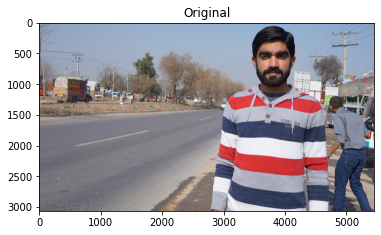

In [ ]:
image=Image.open(dataset[0])
display_one(image)

In [ ]:
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(int(x1)), abs(int(y1))
x2, y2 = int(x1 + width),int( y1 + height)

In [ ]:
face = pixels[y1:y2, x1:x2]
# resize pixels to the model size
find_image = Image.fromarray(face)

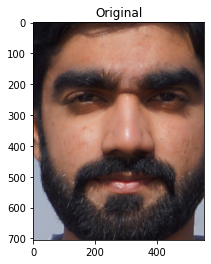

(554, 705)

In [ ]:
display_one(find_image)
find_image.size

In [ ]:
opencvImage = cv2.cvtColor(np.asarray(find_image), cv2.COLOR_RGB2BGR)
display_one(opencvImage)
gray = cv2.cvtColor(opencvImage, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


In [ ]:
gray= cv2.resize(gray,(200,260))

In [ ]:
vect=[]

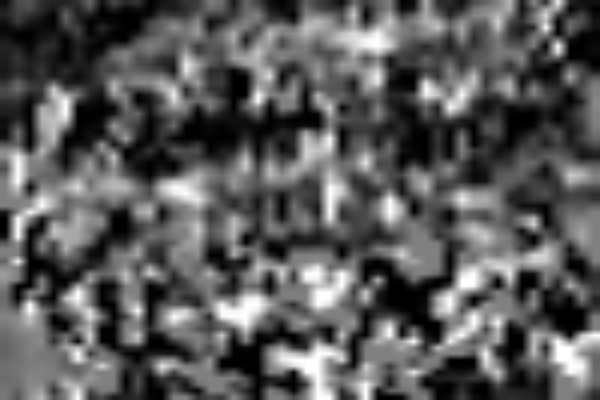

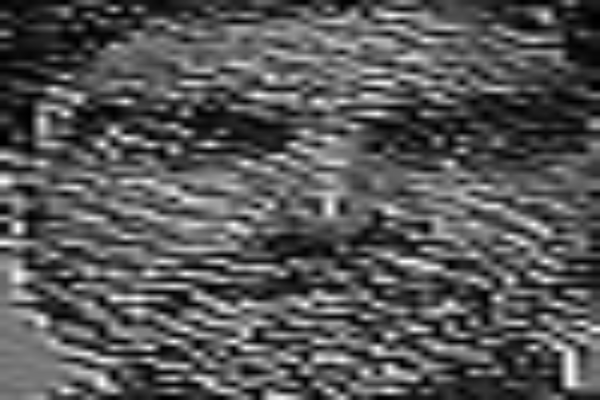

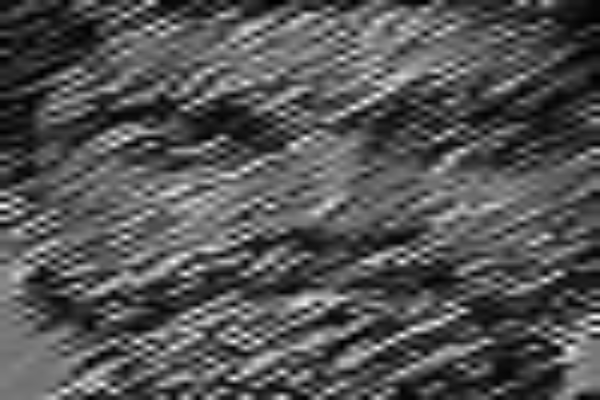

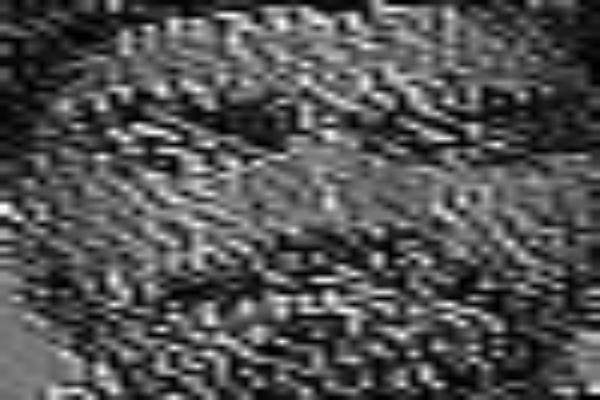

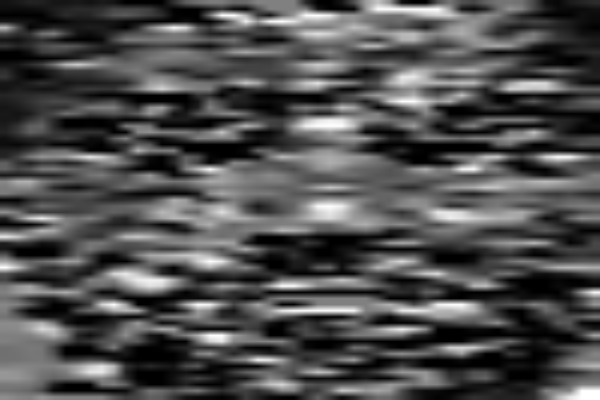

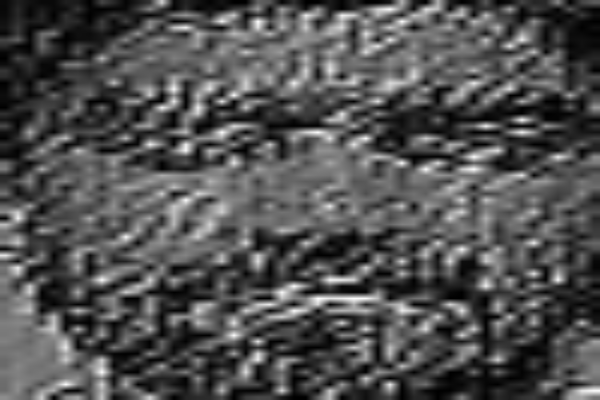

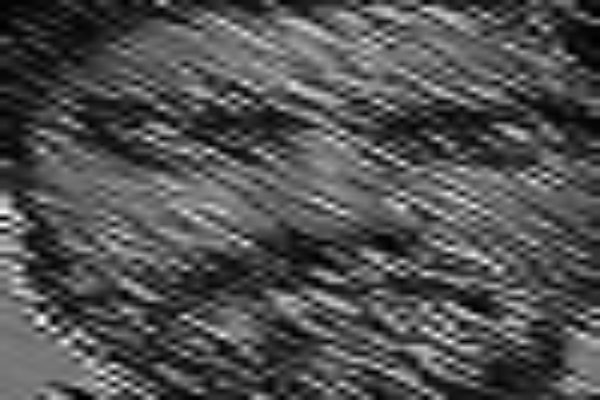

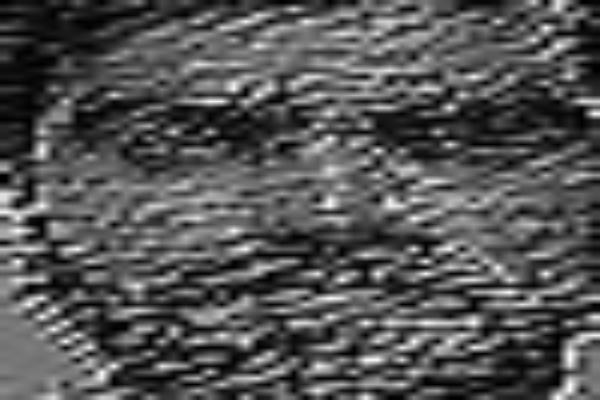

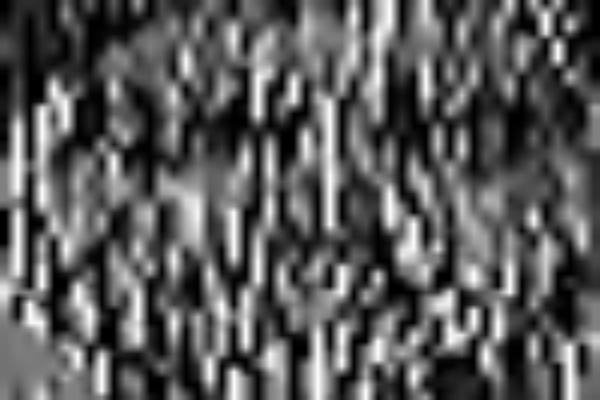

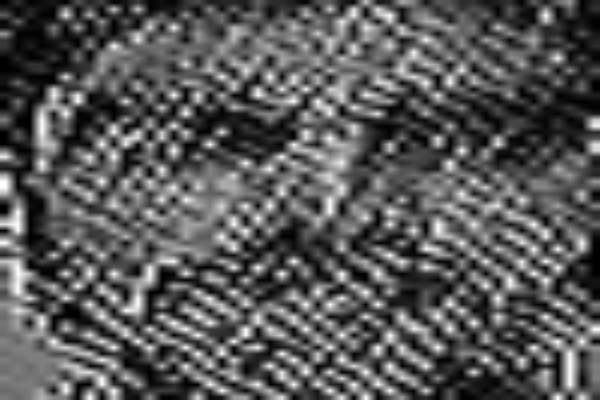

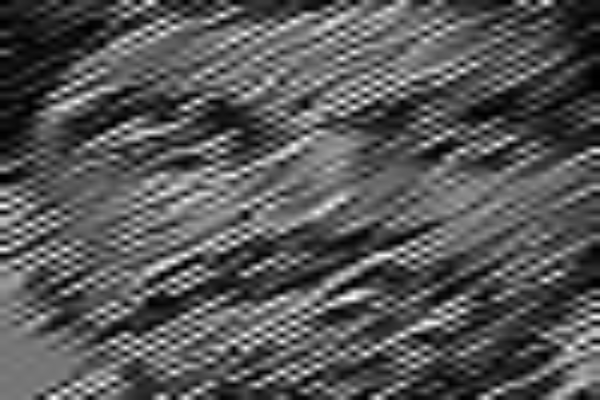

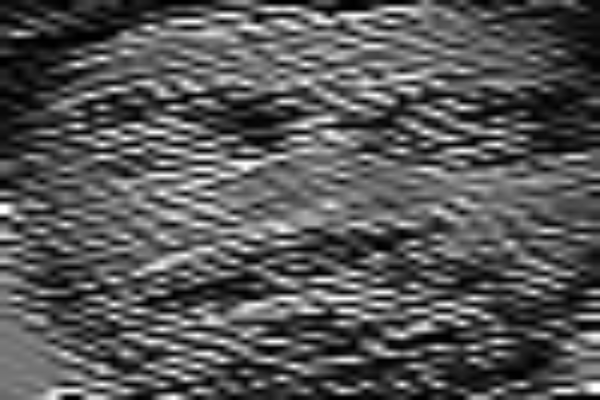

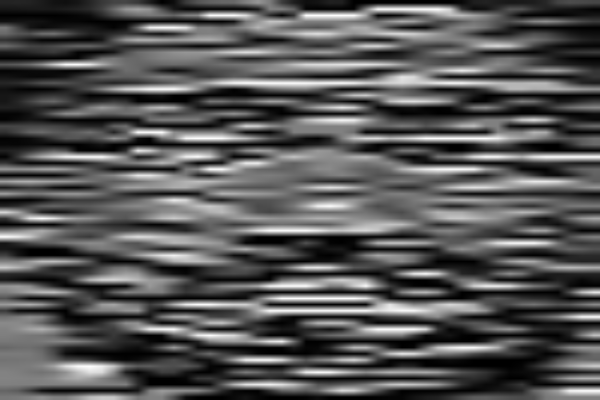

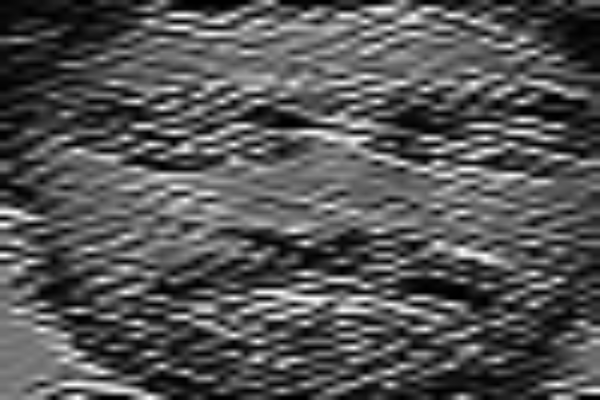

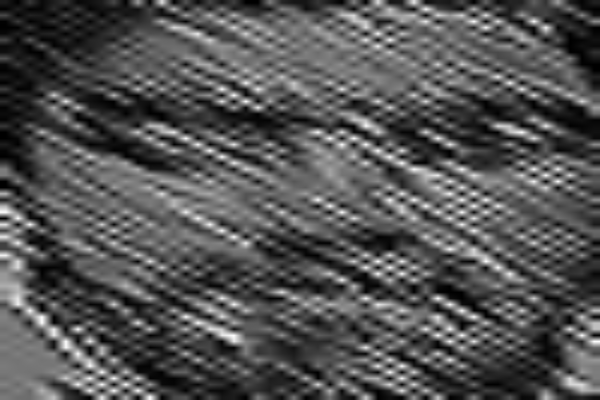

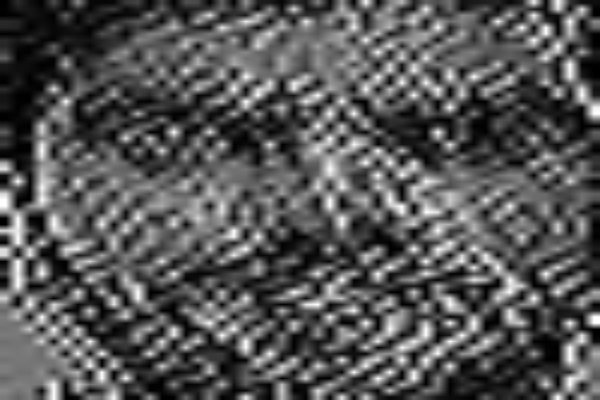

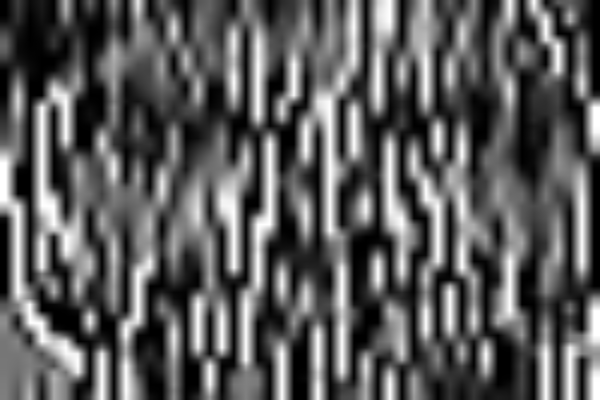

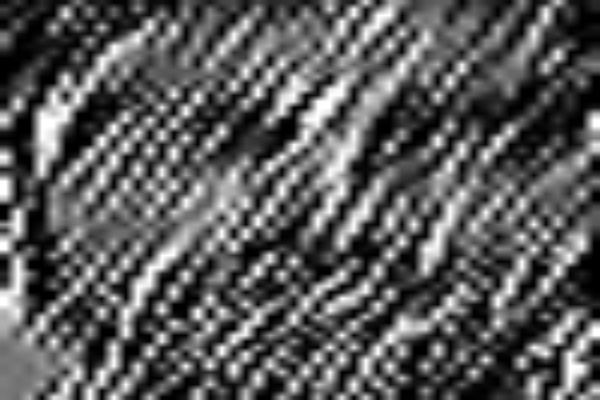

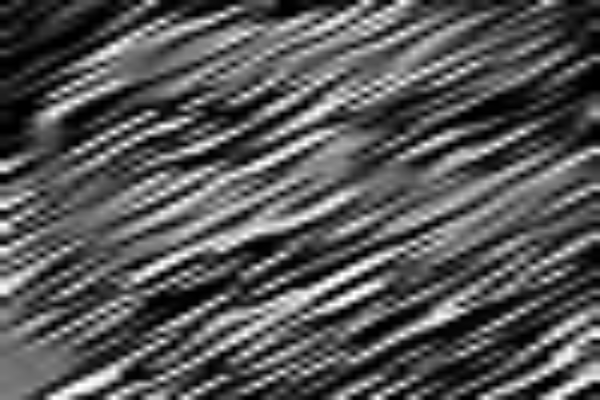

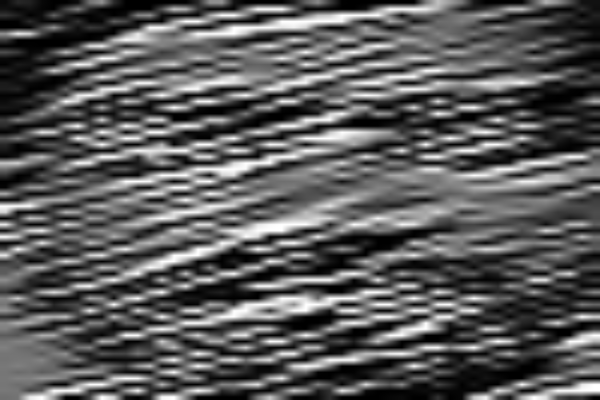

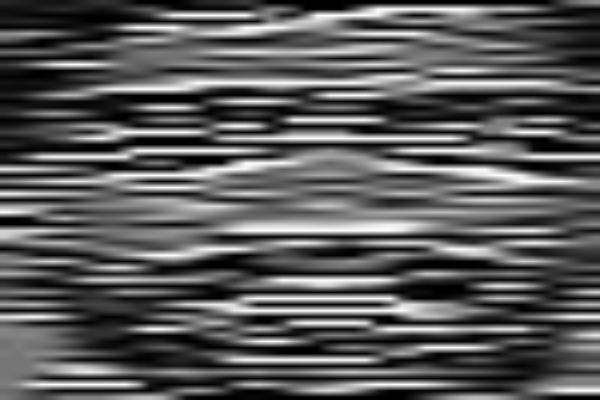

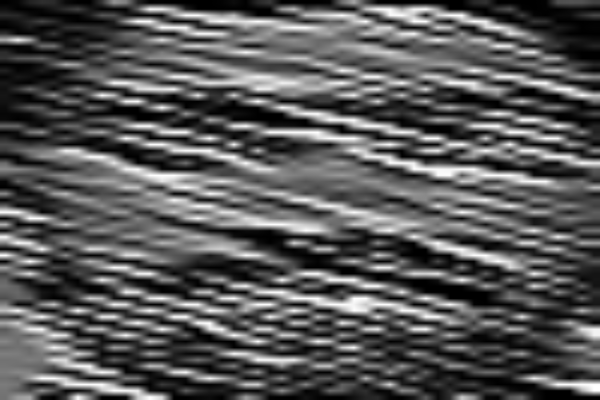

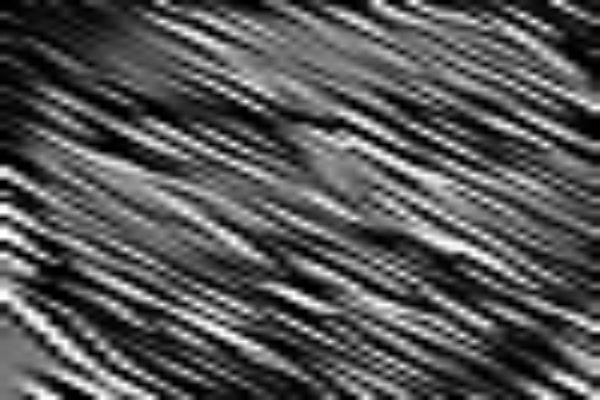

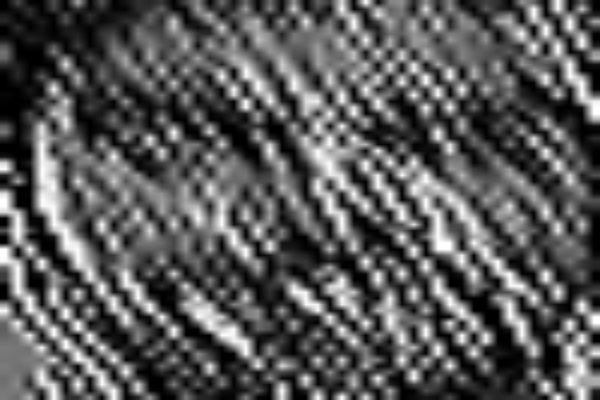

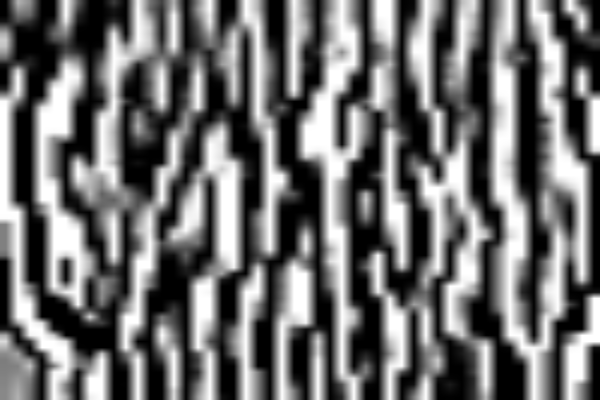

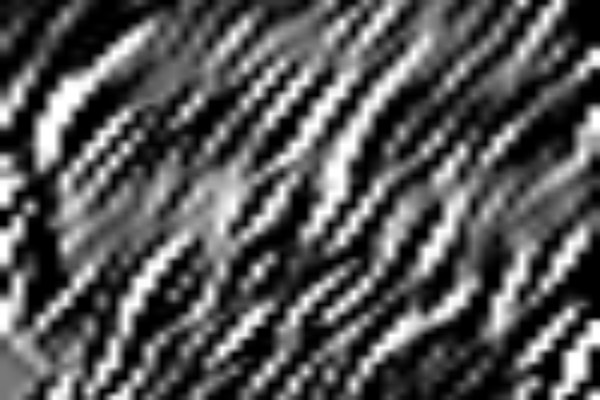

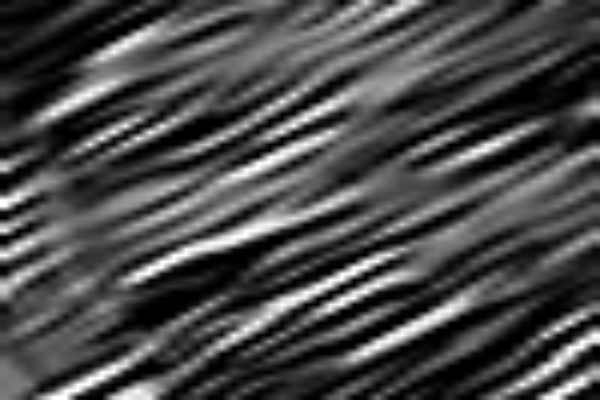

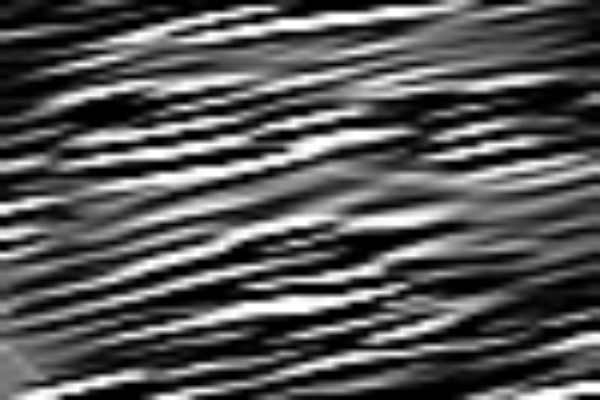

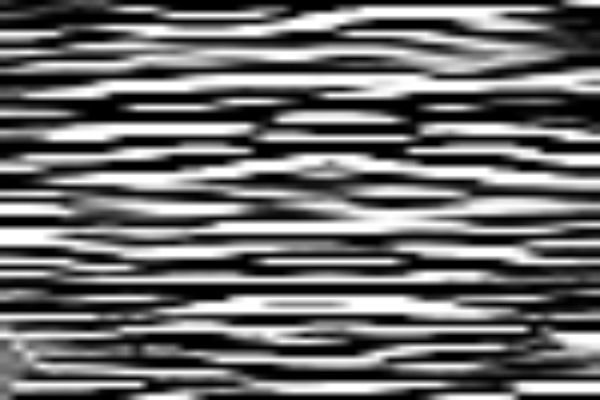

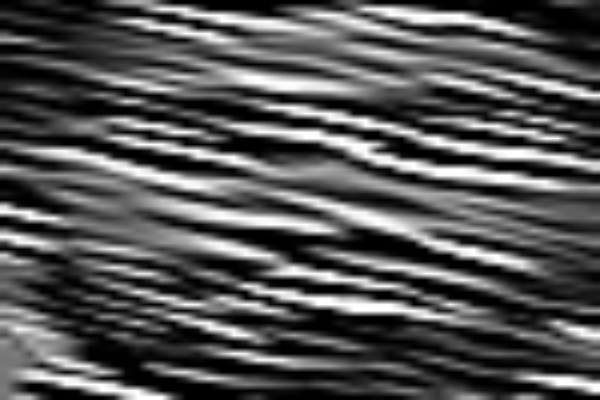

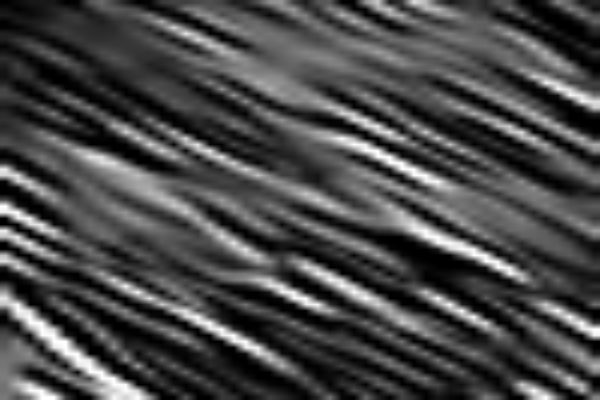

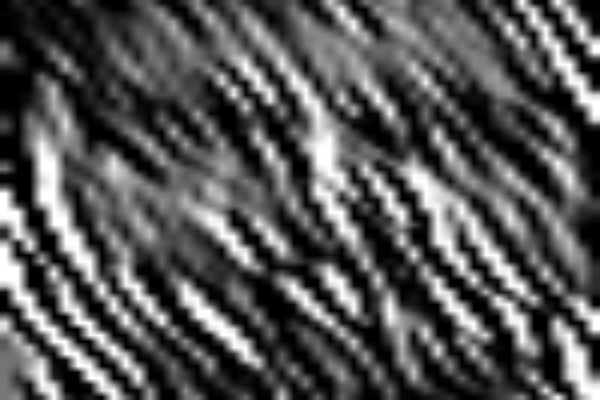

In [ ]:
def build_filters():
    filters = []
    thet=[4,5.656,8,11.313,16]
    #thet=[6,8.656,11,15.313,20]
    #thet=[6,9.656,14,19.313,24]
    ksize = 39+6+6+4
    ksize = 39
    for val in range(0,4):
        lamda=thet[val]
        sigma=0.56*lamda
        for theta in np.arange(0, np.pi, np.pi /8):
            kern = cv2.getGaborKernel((ksize, ksize),sigma, theta,lamda, 0.5, 0., ktype=cv2.CV_32F)
            kern /= 1.5*kern.sum()
            #kern = cv2.normalize(kern, kern, 1.0, 0, cv2.NORM_L2)
            filters.append(kern)
    return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

filters=build_filters()
cv2.waitKey(0)

for kern in filters:
  fimg = cv2.filter2D(gray, cv2.CV_8UC3, kern)
  fimg= cv2.resize(fimg,(50,65)) 
  im_arr = np.array(fimg)
  im_list=im_arr.flatten()
  vect=np.concatenate((vect,im_list))
  cv2_imshow(cv2.resize(fimg, (600, 400)))
vect=vect.reshape(1,-1)



In [ ]:
vect.shape

(1, 104000)

In [ ]:
arr=np.zeros(36,dtype=float)
dataset_t=loadImagest(image_path)

In [ ]:
for x in range(0,36):
  imaget=Image.open(dataset_t[x])
  image = imaget.convert('RGB')
  # convert to array
  pixels = np.asarray(image)
  # detect faces in the image
  results = detector.detect_faces(pixels)
  # extract the bounding box from the first face
  x1, y1, width, height = results[0]['box']
# bug fix
  x1, y1 = abs(int(x1)), abs(int(y1))
  x2, y2 = int(x1 + width),int( y1 + height)
  t_face = pixels[y1:y2, x1:x2]
  # resize pixels to the model size
  image = Image.fromarray(t_face)
  opencvImage = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)
  t_gray = cv2.cvtColor(opencvImage, cv2.COLOR_BGR2GRAY)
  cv2_imshow(t_gray)
  t_gray= cv2.resize(t_gray,(200,260))
  t_filters=build_filters()
  #t_vect= np.empty(size, dtype=float, order='C')
  #t_vect=t_vect.reshape(1,-1)
  t_vect=[]
  for kern in t_filters:
      t_fimg = cv2.filter2D(t_gray, cv2.CV_8UC3, kern)
      t_fimg= cv2.resize(t_fimg,(50,65))
      im_arr = np.array(t_fimg)
      t_im_list=im_arr.flatten()
      t_vect=np.concatenate((t_vect,t_im_list))
      cv2_imshow(cv2.resize(im_arr, (600, 400)))
  #t_vect=t_vect[1:,:]
  t_vect=t_vect.reshape(1,-1)
  #t_vect=pca.transform(t_vect)
  #vect=vect.flatten()
  final_distance=distance.euclidean(vect,t_vect)
  arr[x]=final_distance
  print(x)

In [ ]:
arr

array([34826.29256754, 36062.75671659, 30078.40988151, 32613.81342315,
       32219.69517236, 32418.96150403, 34833.78830963, 32186.01483564,
       32428.10184084, 33138.02993541, 32866.94187173, 33302.64723712,
       36832.33306485, 35868.08971774, 33987.28546089, 33399.1307821 ,
       34861.4807775 , 34238.17024901, 35721.41637729, 35736.38732441,
       33412.13873729, 34739.34977803, 34230.90783196, 30038.23223827,
       31001.77382022, 34303.17912381, 36010.74000906, 33134.15853768,
       37098.99118575, 34651.69808249, 35804.98399664, 35534.39504199,
       35053.73040063, 33412.79418127, 33878.30153653, 35477.5312839 ])

In [ ]:
arr[arr<31013]

array([30078.40988151, 30038.23223827, 31001.77382022])

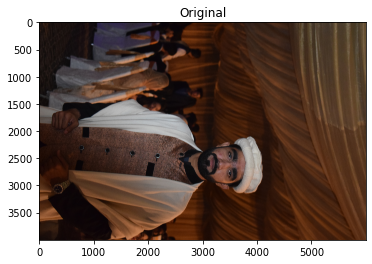

23

In [ ]:
index=np.argmin(arr)
image=Image.open(dataset_t[index])
display_one(image)
index